In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

from permute.core import two_sample

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/labs/lab1/data/nba.csv')

In [3]:
data

,Unnamed: 0,player,team,atm_away,atm_home,score_away,score_home,atm_total,score_total
0,7,A. Johnson,ATL,30,34,24,28,64,52
1,10,A. Johnson,TOR,63,57,44,38,120,82
2,15,Abdur-Rahim,SAC,114,124,84,90,238,174
3,22,Afflalo,DEN,236,284,189,227,520,416
4,23,Afflalo,DET,75,88,62,67,163,129
...,...,...,...,...,...,...,...,...,...
931,1687,Yi,NJN,54,79,44,59,133,103
932,1688,Yi,WAS,55,36,38,24,91,62
933,1690,Young,MEM,163,155,130,114,318,244
934,1691,Young,PHI,406,401,302,285,807,587


Будем сравнивать реализацию бросков дома и в гостях: отношение удачных бросков к общему числу (я так понял слова "успех бросков")

In [4]:
data['percent_home'] = data['score_home'] / data['atm_home']
data['percent_away'] = data['score_away'] / data['atm_away']
data

,Unnamed: 0,player,team,atm_away,atm_home,score_away,score_home,atm_total,score_total,percent_home,percent_away
0,7,A. Johnson,ATL,30,34,24,28,64,52,0.823529,0.800000
1,10,A. Johnson,TOR,63,57,44,38,120,82,0.666667,0.698413
2,15,Abdur-Rahim,SAC,114,124,84,90,238,174,0.725806,0.736842
3,22,Afflalo,DEN,236,284,189,227,520,416,0.799296,0.800847
4,23,Afflalo,DET,75,88,62,67,163,129,0.761364,0.826667
...,...,...,...,...,...,...,...,...,...,...,...
931,1687,Yi,NJN,54,79,44,59,133,103,0.746835,0.814815
932,1688,Yi,WAS,55,36,38,24,91,62,0.666667,0.690909
933,1690,Young,MEM,163,155,130,114,318,244,0.735484,0.797546
934,1691,Young,PHI,406,401,302,285,807,587,0.710723,0.743842


Нарисуем плотности вероятности

<AxesSubplot:xlabel='percent_away', ylabel='Density'>

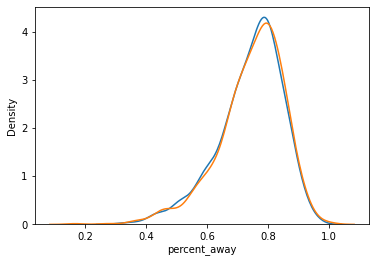

In [5]:
sns.kdeplot(data['percent_away'])
sns.kdeplot(data['percent_home'])

Видим, что данные похожи на нормальные, проверим это по критериям и qq-plot

In [10]:
st.jarque_bera(data['percent_away'])[1], st.shapiro(data['percent_away'])[1]

(0.0, 1.4541871167582485e-15)

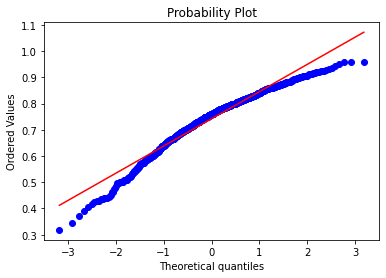

In [11]:
st.probplot(data['percent_away'], plot=plt)
plt.show()

Критерии отвергают гипотезу нормальности, на qq-plot точки не очень хорошо ложатся на прямую, поэтому лучше не стоит доверять критерию Стьюдента для связанных выборок

In [7]:
st.ttest_rel(data['percent_away'], data['percent_home'], alternative='two-sided')

Ttest_relResult(statistic=-1.3333111977331342, pvalue=0.18275444509432728)

Перестановочный критерий использовать можно, так как он для него все требования удовлетворены

In [6]:
two_sample(data['percent_away'], data['percent_home'], reps=1000, alternative='two-sided')[0]

0.5354645354645355

Как видим, гипотеза о равенстве средних не отклоняется.

А теперь посмотрим, для многих ли игроков разница существенна. Для этого построим гистограмму для разности процентов реализации в гостях и дома.

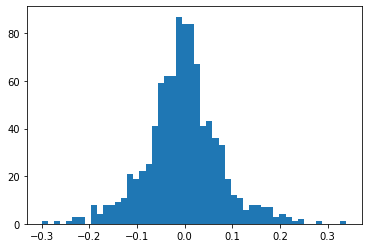

In [10]:
plt.hist(data['percent_away'] - data['percent_home'], bins=50)
plt.show()

Как видим, примерно одинаковое количество игроков с лучшей домашней и гостевой реализацией. Посчитаем, для какого процента игроков эта разница существенна  (больше 0.1 по модулю).

In [12]:
len([i for i in range(len(data)) if abs(data.loc[i]['percent_away'] - data.loc[i]['percent_home']) > 0.1]) / len(data)

0.172008547008547

Примерно у 17% игроков разница в домашней и гостевой реализации не менее 10%